In [1]:
model_name = 'rf-baseline-wo'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/d-wo-ns.csv')

In [4]:
# df.columns

In [5]:
# df.head()

In [6]:
df.shape

(2141, 87)

In [7]:
# df.info()

In [8]:
X = df.drop('throughput',axis=1)

In [9]:
X.shape

(2141, 86)

In [10]:
y = df['throughput']

In [11]:
y.shape

(2141,)

In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
mae

3.1960899042347948

In [14]:
mse

18.920772467914976

In [15]:
rmse

4.34980142856142

In [16]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=[f'{model_name}'])
err_df

,rf-baseline-wo
MAE,3.196090
MSE,18.920772
RMSE,4.349801


In [17]:
err_df.to_csv(f'./baseline-err/{model_name}.csv')

In [18]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,13.361530
std,5.746756
min,2.851337
25%,8.283453
50%,13.272120
75%,17.618814
max,29.000937


<AxesSubplot:ylabel='Count'>

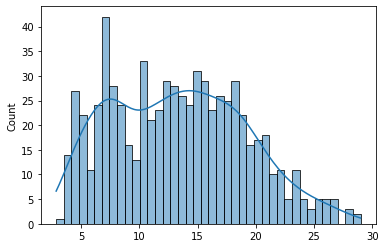

In [19]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

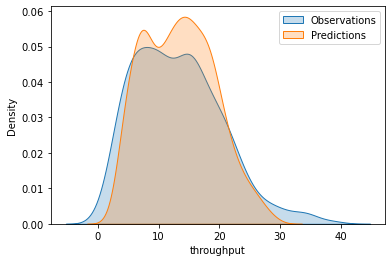

In [20]:
fig,ax = plt.subplots()

sns.kdeplot(y_test, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

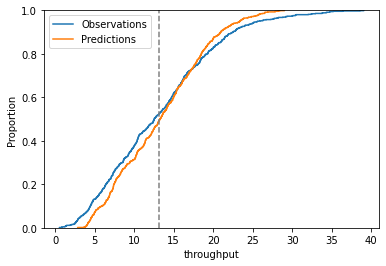

In [21]:
fig,ax = plt.subplots()

sns.ecdfplot(y_test, ax=ax, label='Observations')
sns.ecdfplot(y_pred, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [22]:
# y.describe().drop(['count'])

In [23]:
res = y_test - y_pred
res.describe().drop('count')

mean    -0.155154
std      4.350111
min    -13.767038
25%     -2.578472
50%     -0.503273
75%      2.110648
max     18.011544
Name: throughput, dtype: float64

Text(0.5, 0, 'Residuals')

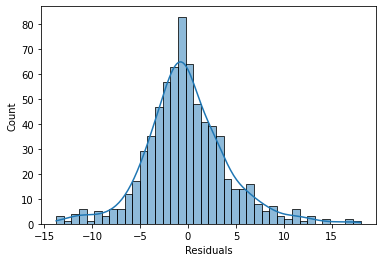

In [24]:
sns.histplot(data=res, kde=True,bins=40)
plt.xlabel('Residuals')

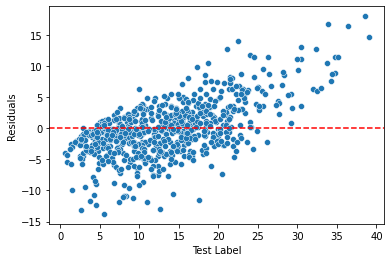

In [25]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

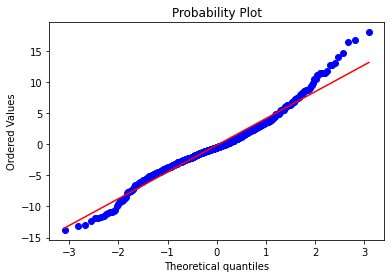

In [26]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [27]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_rf = scaler.transform(X)

rf_model = RandomForestRegressor()
rf_model.fit(X_rf,y)

RandomForestRegressor()

In [28]:
# model.coef_

In [29]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [30]:
# rf_model.coef_

In [31]:
# coef_df = pd.DataFrame(data=rf_model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [32]:
# delta_df = pd.DataFrame(data=rf_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
# delta_df

In [33]:
# pd.set_option('display.max_columns',None)
# delta_df.sort_values('delta_beta').sort_values('delta_beta').transpose()

In [34]:
# sns.histplot(data=delta_df,bins=40,kde=True)

In [35]:
y_pred_rf = rf_model.predict(X_rf)

<AxesSubplot:ylabel='Count'>

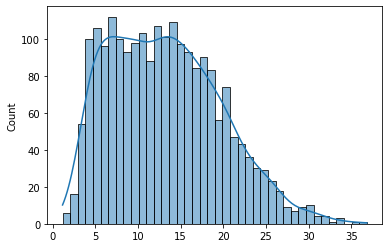

In [36]:
sns.histplot(y_pred_rf,bins=40,kde=True)

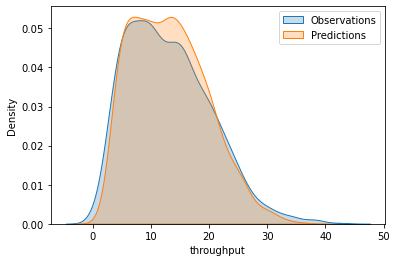

In [37]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_rf, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

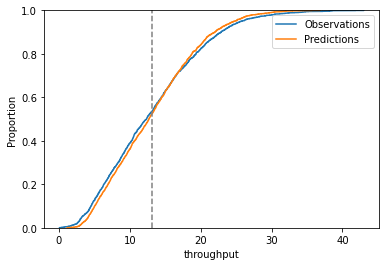

In [38]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_rf, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [39]:
mae = mean_absolute_error(y,y_pred_rf)
mse = mean_squared_error(y,y_pred_rf)
rmse = np.sqrt(mse)

In [40]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['RF'])
err_df

,RF
MAE,1.135464
MSE,2.552577
RMSE,1.597678


In [41]:
# err_df.to_csv(f'./model-err/{model_name}.csv')

In [42]:
from joblib import dump, load
dump(rf_model, f'./baseline-models/{model_name}.joblib')

['./baseline-models/rf-baseline-wo.joblib']

DONE!